In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import floor,ceil

# Helper functions

In [2]:
# get_img_intensity is a helper function to obtain the image intensity of an image 
# at a given coordinate if it exists
def get_img_intensity(img,x,y):
    assert len(img.shape)==2 # Checking if image shape is 2D
    # Checking if x and y are integers
    assert isinstance(x,int) 
    assert isinstance(y,int)
    if x<0 or x>=img.shape[0] or y<0 or y>=img.shape[1]:
        return 0
    else:
        return img[x,y]

# get_bilinear_interpolation_intensity takes source_image, x and y coordinates(possibly in decimals)
# and calculates intensity using Bilinear Interpolation from the image
def get_bilinear_interpolation_intensity(img_source,xs,ys):
    assert len(img_source.shape)==2
    xsd,ysd = int(floor(xs)),int(floor(ys))
    a,b = xs - xsd, ys - ysd
    return int((1-a)*(1-b)*get_img_intensity(img_source,xsd,ysd) + \
           (a)*(1-b)*get_img_intensity(img_source,xsd+1,ysd) + \
           (1-a)*(b)*get_img_intensity(img_source,xsd,ysd+1) + \
           (a)*(b)*get_img_intensity(img_source,xsd+1,ysd+1))


# Q1

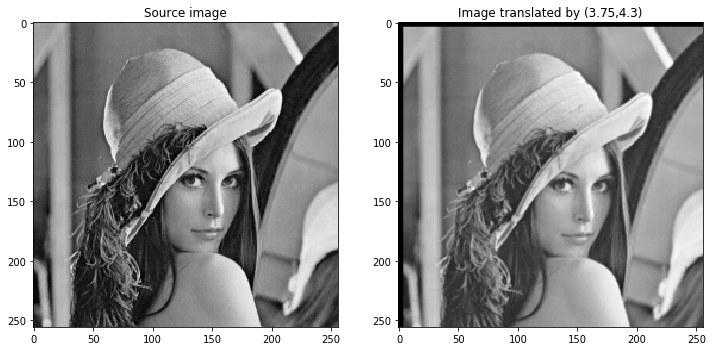

In [3]:
img_src = cv2.imread('lena_translate.png',0)
(l,w) = img_src.shape

tx,ty = 3.75,4.3
target_img = np.zeros((l,w))
for i in range(l):
    for j in range(w):
        # Translate the target image coordinates to obtain the source img coordinates
        i_s,j_s = i-tx,j-ty
        # Perform bilinear interpolation to find the target image intensity for each pixel
        target_img[i,j] = get_bilinear_interpolation_intensity(img_src,i_s,j_s)

# Plot images
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,12))
# ax1.set_axis_off()
# ax2.set_axis_off()
ax1.set_title("Source image")
ax2.set_title("Image translated by (3.75,4.3)")
ax1.imshow(img_src,cmap='gray')
ax2.imshow(target_img,cmap='gray')

The above images show the source image and the image after translation by (3.75,4.3). The 

We notice that the image has "lightened" a bit. This is because bilinear interpolation is essentially a form of weighted averaging of pixel intensities and this averaging has resulted in slight increase in intensity of the darker pixels. The picture also appears to be more blurry which is also a result of the averaging in bilinear interpolation.

# Q2

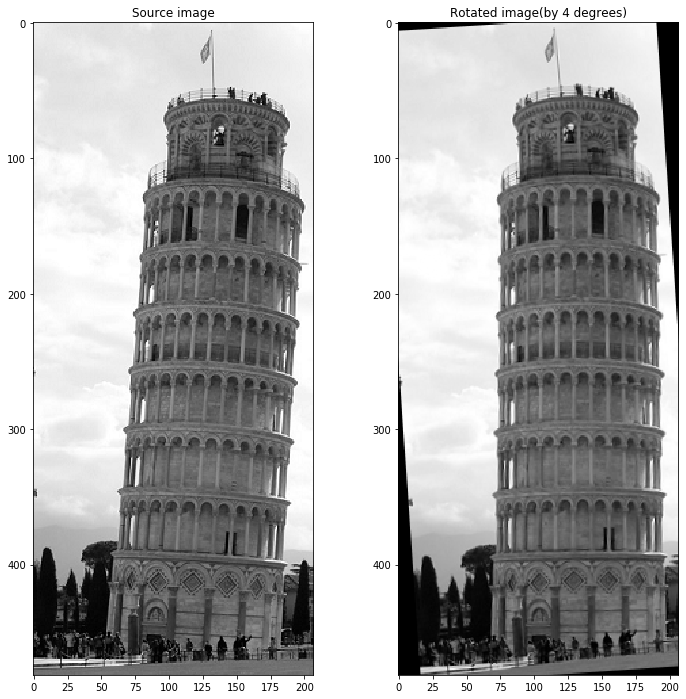

In [4]:
img_src2 = cv2.imread('pisa_rotate.png',0)
(l,w) = img_src2.shape
center = np.array([l/2,w/2])

# By trial and error, 4 degrees anticlockwise was the best estimate of the angle by which the image had to be
# rotated to obtain an erect Pisa tower
theta = np.deg2rad(-4) # Convert to radians
rotMat = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
rotMatInv = np.linalg.inv(rotMat) # FInd inverse of the rotation matrix

target_img2 = np.zeros((l,w))
for i in range(l):
    for j in range(w):
        # Rotate the target image coordinates to obtain the source img coordinates
        [i_s,j_s] = center + rotMatInv @ np.array([i,j] - center) 
        # Perform bilinear interpolation to find the target image intensity for each pixel
        target_img2[i,j] = get_bilinear_interpolation_intensity(img_src2,i_s,j_s)

# Plot images
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,12))
# ax1.set_axis_off()
# ax2.set_axis_off()
ax1.set_title("Source image")
ax2.set_title("Rotated image(by 4 degrees)")
ax1.imshow(img_src2,cmap='gray')
ax2.imshow(target_img2,cmap='gray')

The above images show the source image and the image after Rotation by 4 degrees about the image center to straighten
the Leaning Tower of Pisa.

# Q3

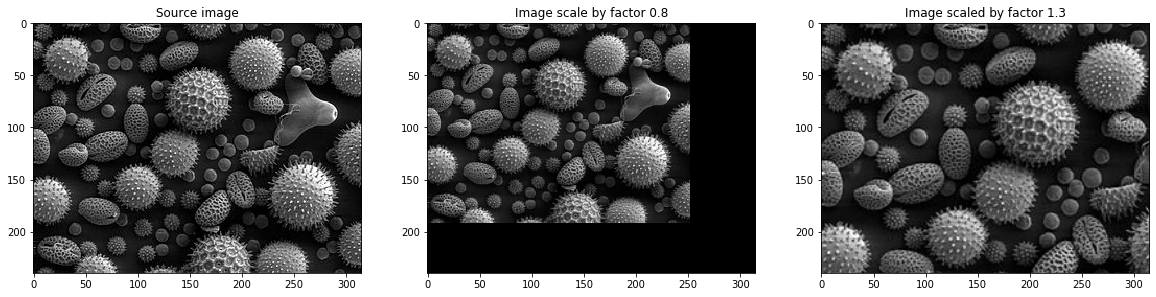

In [ ]:
img_src3 = cv2.imread('cells_scale.png',0)
(l,w) = img_src3.shape

# Calculate transformation matrix and its inverse
ScalMat1 = np.array([[0.8,0],[0,0.8]])
ScalMatInv1 = np.linalg.inv(ScalMat1)

ScalMat2 = np.array([[1.3,0],[0,1.3]])
ScalMatInv2 = np.linalg.inv(ScalMat2)

target_img3_1 = np.zeros((l,w))
target_img3_2 = np.zeros((l,w))
for i in range(l):
    for j in range(w):
        # Multiply target coordinates by Inverse transformation matrix to obtain the source image coordinates
        [i_s1,j_s1] = ScalMatInv1 @ np.array([i,j])
        # Perform bilinear interpolation to find the target image intensity for each pixel
        target_img3_1[i,j] = get_bilinear_interpolation_intensity(img_src3,i_s1,j_s1)
        
        # Repeat the same steps to scale by factor of 1.3
        [i_s2,j_s2] = ScalMatInv2 @ np.array([i,j])
        target_img3_2[i,j] = get_bilinear_interpolation_intensity(img_src3,i_s2,j_s2)

# Plot images
f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,20))
# ax1.set_axis_off()
# ax2.set_axis_off()
ax1.set_title("Source image")
ax2.set_title("Image scaled by factor 0.8")
ax3.set_title("Image scaled by factor 1.3")
ax1.imshow(img_src3,cmap='gray')
ax2.imshow(target_img3_1,cmap='gray')
ax3.imshow(target_img3_2,cmap='gray')

The above images show the source image and the image scaled by factors of 0.8 and 1.3 about the top left corner of the image i.e. (0,0). 